In [1]:
import os.path
import pandas as pd
import orodja
%matplotlib inline

vsi_kovanci = orodja.seznam_kovancev()

pd.options.display.max_rows = 20

def vrni_kovanec(ime):
    return pd.read_csv('./podatki/'+ ime + '.csv')
kovanci_df = {}
posamezni_podatki = []
for kovanec in vsi_kovanci:
    if not os.path.isfile('./podatki/'+ kovanec + '.csv'):
        continue
    kovanec_df = vrni_kovanec(kovanec)
    # Dodajanje kolone z imenom kovanca
    kovanec_df['kovanec'] = pd.Series([kovanec] * len(kovanec_df.index), index=kovanec_df.index)
    posamezni_podatki.append(kovanec_df)
    kovanci_df[kovanec] = kovanec_df
    
kovanci = pd.concat(posamezni_podatki)
# Dodajanje dnevne spremembe -> delta
kovanci['delta'] =(kovanci['koncna']/kovanci['zacetna'])

In [2]:
kovanci # Vsi podatki o vseh kriptovalutah

,datum,zacetna,najnizja,najvisja,koncna,volumen,kapital,kovanec,delta
0,2017-1-01,963.660000,1003.080000,958.700000,998.330000,147775000.0,1.549120e+10,bitcoin,1.035977
1,2017-1-02,998.620000,1031.390000,996.700000,1021.750000,222185000.0,1.605510e+10,bitcoin,1.023162
2,2017-1-03,1021.600000,1044.080000,1021.600000,1043.840000,185168000.0,1.642660e+10,bitcoin,1.021770
3,2017-1-04,1044.400000,1159.420000,1044.400000,1154.730000,344946000.0,1.679540e+10,bitcoin,1.105640
4,2017-1-05,1156.730000,1191.100000,910.420000,1013.380000,510199000.0,1.860400e+10,bitcoin,0.876073
5,2017-1-06,1014.240000,1046.810000,883.940000,902.200000,351876000.0,1.631410e+10,bitcoin,0.889533
6,2017-1-07,903.490000,908.590000,823.560000,908.590000,279550000.0,1.453440e+10,bitcoin,1.005645
7,2017-1-08,908.170000,942.720000,887.250000,911.200000,158715000.0,1.461140e+10,bitcoin,1.003336
8,2017-1-09,913.240000,913.690000,879.810000,902.830000,141877000.0,1.469490e+10,bitcoin,0.988601
9,2017-1-10,902.440000,914.870000,901.060000,907.680000,115808000.0,1.452260e+10,bitcoin,1.005806


# Najvrednejši kovanci po maksimalnem kapitalu v naboru podatkov

In [3]:
zdruzeni_podatki = kovanci.groupby('kovanec')
zdruzeni_podatki.index = zdruzeni_podatki['datum']
najvrednejsi_kovanci = zdruzeni_podatki['kapital'].last().sort_values(ascending=False)[:10]

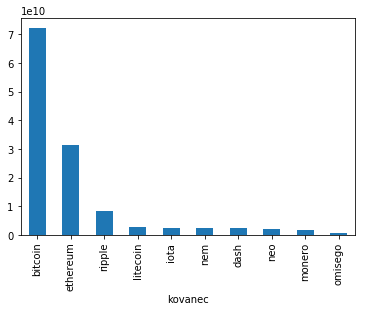

In [4]:
najvrednejsi_kovanci.plot(kind='bar')

# Delež kapitala na celotnem trgu za največjih 8 valut
To nam da vpogled v dejansko stanje posamezne valute in na kakšnem trgu ta valuta stoji.

,Vrednost v $,Delež na trgu
bitcoin,72249100000.0 $,0.511173
ethereum,31288300000.0 $,0.221369
ripple,8368790000.0 $,0.059210
litecoin,2692560000.0 $,0.019050
iota,2545840000.0 $,0.018012
nem,2426580000.0 $,0.017168
dash,2369010000.0 $,0.016761
neo,2015360000.0 $,0.014259
ostali,17384214996.0 $,0.122996


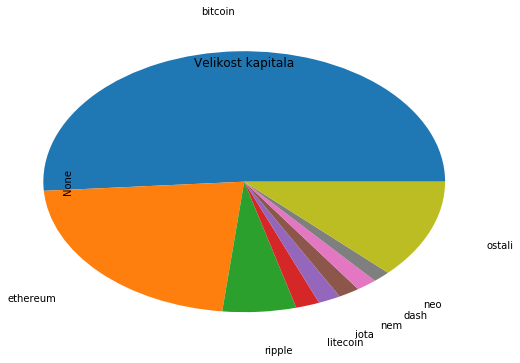

In [5]:
prvih_n = 8
delez_kovancev = pd.concat([
    zdruzeni_podatki['kapital'].last().sort_values(ascending=False)[:prvih_n],
    pd.Series(zdruzeni_podatki['kapital'].last().sort_values(ascending=False)[prvih_n:].sum(), index=['ostali'])
])
# delez_kovancev = delez_kovancev / delez_kovancev.sum() 
delez_kovancev.plot(kind='pie', title='Velikost kapitala', labeldistance=1.3, radius=1.5)
delez_kovancev_tabele = delez_kovancev.round(2).to_frame()
delez_kovancev_tabele['Procenti'] = delez_kovancev_tabele[0] / delez_kovancev_tabele[0].sum()
delez_kovancev_tabele[0] = delez_kovancev_tabele[0].apply(str) + ' $'
delez_kovancev_tabele.columns = ['Vrednost v $', 'Delež na trgu']
delez_kovancev_tabele

# Kovanci z najvišjimi vrednostmi

,koncna
kovanec,
bit20,110806.00
primalbase,6740.62
bitbtc,4412.83
bitcoin,4352.40
bitgold,1399.06
dash,399.85
byteball,369.79
sync,347.61
ethereum,333.88


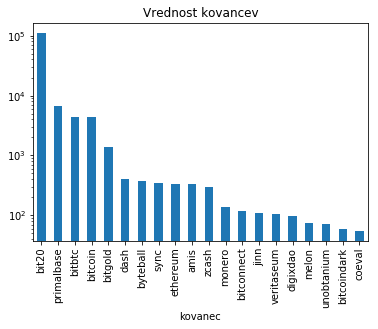

In [6]:
nr_vrednosti = 20
vrednosti_kovancev = zdruzeni_podatki['koncna'].last().sort_values(ascending=False)[:nr_vrednosti]
vrednosti_kovancev.plot(kind='bar', title='Vrednost kovancev').set_yscale('log')
vrednosti_kovancev.round(2).to_frame()

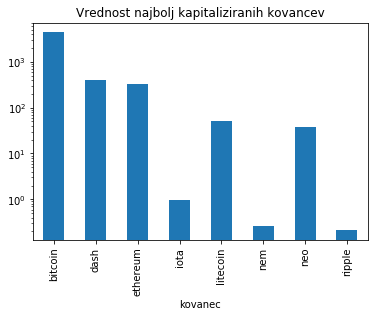

In [7]:
najvec_kapitala = kovanci.loc[kovanci['kovanec'].isin(delez_kovancev.index.values)]
najvec_kapitala.groupby('kovanec').last()['koncna'].plot(kind='bar', title='Vrednost najbolj kapitaliziranih kovancev').set_yscale('log')

# Graf števila kovancev v posamezni kategoriji vrednosti seštet glede na spremembo vrednosti

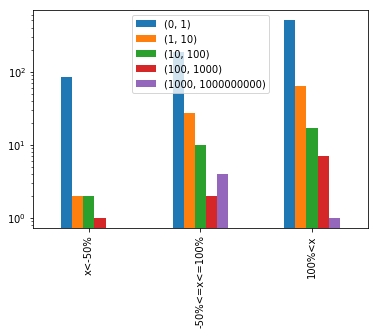

In [52]:
meje_cen = [(0, 1), (1, 10), (10, 100), (100, 1000), (1000, 1000000000)]
procentualne_meje = [0.5, 2]
podatki_o_kovancih = zdruzeni_podatki['koncna'].last().sort_values(ascending=False).to_frame()
kovanci_po_cenah = []
for (minimum, maximum) in meje_cen:
    kovanci_po_cenah.append(podatki_o_kovancih[(minimum <= podatki_o_kovancih['koncna']) & (podatki_o_kovancih['koncna'] < maximum)].index.values)
imena_mej = ['x<-50%', '-50%<=x<=100%', '100%<x']
data_frame_ogrodje = {}
for meja in meje_cen:
    data_frame_ogrodje[meja] = [0]*len(imena_mej)
data_frame_ogrodje['meja med'] = imena_mej
for meja_cene, meja in enumerate(meje_cen):
    for kovanec in kovanci_po_cenah[meja_cene]:
        zacetna = kovanci_df[kovanec]['zacetna'][0]
        koncna = kovanci_df[kovanec]['koncna'][len(kovanci_df[kovanec]['koncna']) - 1]
        delta = koncna / zacetna
        if delta < procentualne_meje[0]:
           data_frame_ogrodje[meja][0] += 1
        elif procentualne_meje[0] <= delta <= procentualne_meje[1]:
           data_frame_ogrodje[meja][1] += 1
        else:
           data_frame_ogrodje[meja][2] += 1
            
        # print(kovanec, koncna/zacetna)
        # data_frame_ogrodje['x<-1%'][meja_cene] += 0
        # data_frame_ogrodje['-1%<=x<=1%'][meja_cene] += 0
        # data_frame_ogrodje['1%<x'][meja_cene] += 0
# kovanci_df['bitcoin']
plot_1 = pd.DataFrame(data_frame_ogrodje).plot(kind='bar')
plot_1.set_xticklabels(imena_mej)
plot_1.set_yscale('log')